### Регрессия

In [1]:
import numpy as np
import matplotlib.pyplot as plt

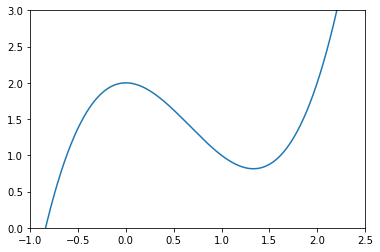

In [2]:
f = lambda x: x**3-2*x**2+2
x = np.linspace(-1,2.5,1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

### Метод градиентного спуска

Оптимизационный алгоритм для поиска локального минимума функции. Относится к методам первого порядка. Для поиска минимума делаем шаг в направлении, обратном градиенту функции.

Алгоритм:
1. Задаем $\gamma$ - "learning rate"
2. Выбираем начальное приближение $x_0$
3. for k = 0, 1, 2 ... do
    1. $s_k$ = -$\nabla f(x_k)$
    2. $x_{k+1} = x_k + \gamma s_k$

In [3]:
learning_rate = 0.1#выбор шага (скорость обучения)
points = [2]
n_epochs = 15#кол-во эпох

In [4]:
points[-1]

2

In [5]:
for _ in range(n_epochs):
    cur_point = points[-1]
    grad = f(cur_point)
    new_point = cur_point - learning_rate  * grad
    points.append(new_point)

In [6]:
grad

1.6977481221212702

In [7]:
y_points = [f(p) for p in points]

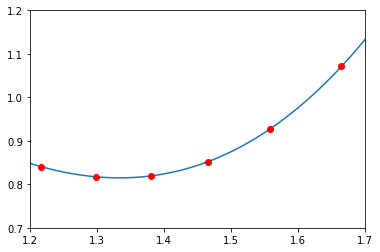

In [8]:
plt.plot(x,f(x))
plt.plot(points, y_points, 'ro')
plt.xlim([1.2,1.7])
plt.ylim([0.7,1.2])
plt.show()

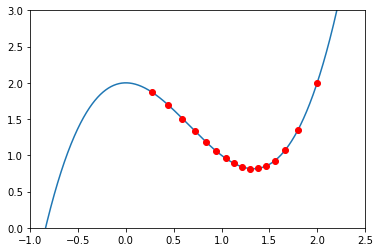

In [9]:
plt.plot(x,f(x))
plt.plot(points, y_points, 'ro')
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

### Метод nesterov momentum

1. $v'$ = m*v -lr * $\nabla(x+m*$v)
2. $w' = x + v'$

In [10]:
learning_rate = 0.1#выбор шага (скорость обучения)
points_m = [2]
n_epochs = 15#кол-во эпох
momentum = 0.5
velocity = 0.0

In [11]:
for _ in range(n_epochs):
    cur_points_m = points_m[-1]
    grad = f(cur_points_m)+ momentum*velocity
    velocity =  momentum*velocity - learning_rate*grad
    new_point_m = cur_points_m +velocity  
    points_m.append(new_point_m)

In [12]:
y_points = [f(p) for p in points_m] 

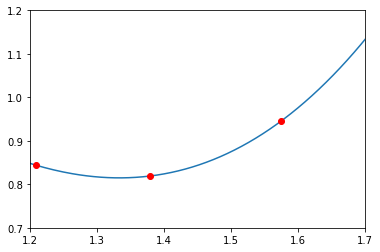

In [13]:
plt.plot(x,f(x))
plt.plot(points_m, y_points, 'ro')
plt.xlim([1.2,1.7]) 
plt.ylim([0.7,1.2])
plt.show()

plt.plot(x,f(x))
plt.plot(points_m, y_points, 'ro')
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

### Метод rmsprop (Root Mean Square Propagation)

1. $v_t=B*v_t-_1+(1-B)(\nabla x)^2$

2. $w_t+_1 = w_t - \frac{n}{\sqrt{v_t+e}} * \nabla x$ 

In [14]:
learning_rate = 0.1#выбор шага (скорость обучения)
points_rms = [2]
n_epochs = 15#кол-во эпох
B = .9
eps=1e-8
grad_squared = 0
w=0

In [185]:
points_rms

[2]

In [15]:
for _ in range(n_epochs):
    cur_point_rms = points_rms[-1]
    grad_rms = f(cur_point_rms)
    grad_squared = B*grad_squared+(1-B)*pow(grad_rms,2)
    w = w - (learning_rate/np.sqrt(grad_squared+eps))*grad_rms
    points_rms.append(w)


In [16]:
y_points = [f(p) for p in points_rms] 

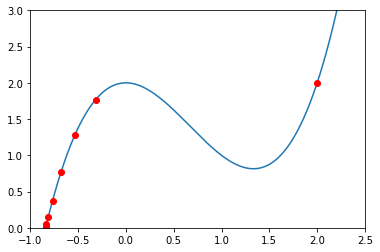

In [17]:
plt.plot(x,f(x))
plt.plot(points_rms, y_points, 'ro')
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

### Классификация ирисов методом nesterov momentum

In [18]:
from sklearn.datasets import load_iris

In [19]:
data = load_iris()

In [20]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target']=pd.Series(data.target)

In [22]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
data = df[df['target']!=0]

In [24]:
y = data['target']
del data['target']

In [25]:
#нормирую
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25)

In [28]:
from sklearn.neural_network import MLPClassifier

nesterov = MLPClassifier(activation='logistic', max_iter=800, nesterovs_momentum=True).fit(X_train, y_train)
nesterov = MLPClassifier(activation='logistic', max_iter=800, nesterovs_momentum=True).fit(X_train, y_train)
nesterov.score(X_test, y_test)

0.92

### Классификация ирисов методом rmsprop

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [42]:
# объявление модели

model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu'))#4 входа под каждый признак, 4 нейрона в скрытом слое
model.add(Dropout(0.2))
model.add(Dense(3, activation='sigmoid'))#три выхода — по количеству классов. 
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [66]:
model = Sequential([
  Dense(512,  activation='relu'),
  Dropout(0.2),
  Dense(3, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, verbose=1)
model.evaluate(X_test, y_test)

Epoch 1/50
3/3 [==============================] - 0s 1ms/step - loss: 1.0037 - accuracy: 0.5733
Epoch 2/50
3/3 [==============================] - 0s 2ms/step - loss: 0.7561 - accuracy: 0.8533
Epoch 3/50
3/3 [==============================] - 0s 1ms/step - loss: 0.6219 - accuracy: 0.8533
Epoch 4/50
3/3 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.9333
Epoch 5/50
3/3 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.9200
Epoch 6/50
3/3 [==============================] - 0s 4ms/step - loss: 0.4324 - accuracy: 0.9200
Epoch 7/50
3/3 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.9200
Epoch 8/50
3/3 [==============================] - 0s 2ms/step - loss: 0.3494 - accuracy: 0.9467
Epoch 9/50
3/3 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.9333
Epoch 10/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2891 - accuracy: 0.9600
Epoch 11/50
3/3 [======================

[0.1415436714887619, 0.9599999785423279]

In [115]:
from sklearn.metrics import roc_auc_score

predictions = model.predict_proba(X_test)
print('Accuracy: {}'.format(roc_auc_score(y_true=y_test, y_score=predictions[:,2])))

Accuracy: 0.9935064935064934


In [129]:
predictions = model.predict_proba(X_test)
print('Accuracy: {}'.format(roc_auc_score(y_true=y_test, y_score=predictions[:,1])))

Accuracy: 0.012987012987012991
